**Decision Trees:**

In [54]:
import numpy as np
import pandas as pd

input_file = "PastHires.csv"
df = pd.read_csv(input_file, header = 0)

In [55]:
df

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N
5,0,N,0,PhD,Y,Y,Y
6,5,Y,2,MS,N,Y,Y
7,3,N,1,BS,N,Y,Y
8,15,Y,5,BS,N,N,Y
9,0,N,0,BS,N,N,N


In [56]:
d = {'Y': 1, 'N': 0}
df['Hired'] = df['Hired'].map(d)
df['Employed?'] = df['Employed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)
d = {'BS': 0, 'MS': 1, 'PhD': 2}
df['Level of Education'] = df['Level of Education'].map(d)

In [57]:
df

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0
5,0,0,0,2,1,1,1
6,5,1,2,1,0,1,1
7,3,0,1,0,0,1,1
8,15,1,5,0,0,0,1
9,0,0,0,0,0,0,0


In [58]:
features = list(df.columns[:6])
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

In [59]:
from sklearn import tree
from sklearn.model_selection import train_test_split

X = df[features]
y = df["Hired"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = tree.DecisionTreeClassifier()
# clf = clf.fit(X,y)
clf = clf.fit(X_train, y_train)

[Text(0.6666666666666666, 0.875, 'x[2] <= 5.5\ngini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.5, 0.625, 'x[2] <= 0.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.3333333333333333, 0.375, 'x[4] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

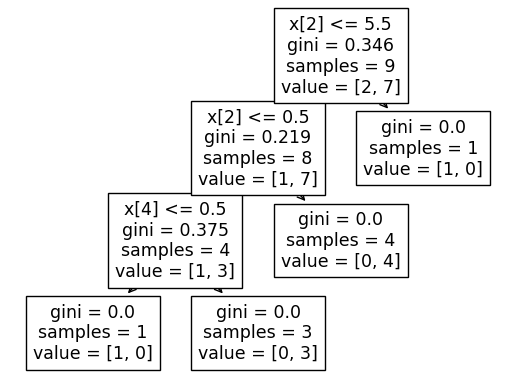

In [60]:
tree.plot_tree(clf)

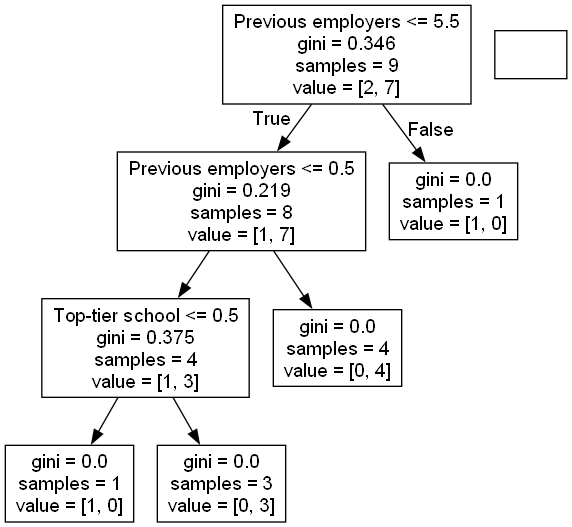

In [61]:
from IPython.display import Image  
from six import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [62]:
# Save the decision tree visualization as a PNG file
output_file_path = "decision_tree.png"
graph.write_png(output_file_path)

True

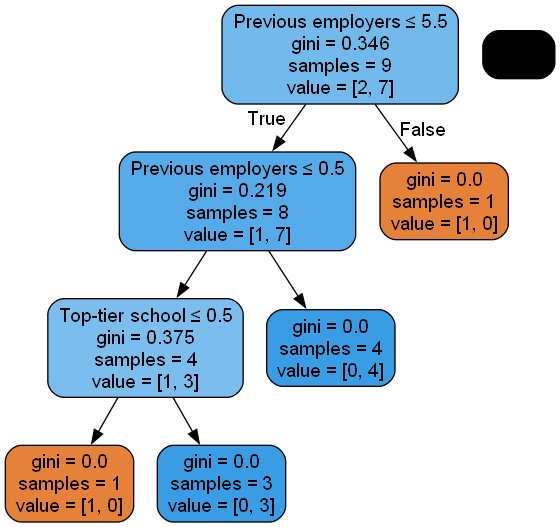

In [63]:
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features,
                         filled=True, rounded=True,
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [64]:
# Save the decision tree visualization as a PNG file
output_file_path = "decision_tree.png"
graph.write_png(output_file_path)

True

['Years Experience', 'Employed?', 'Previous employers', 'Level of Education', 'Top-tier school', 'Interned']


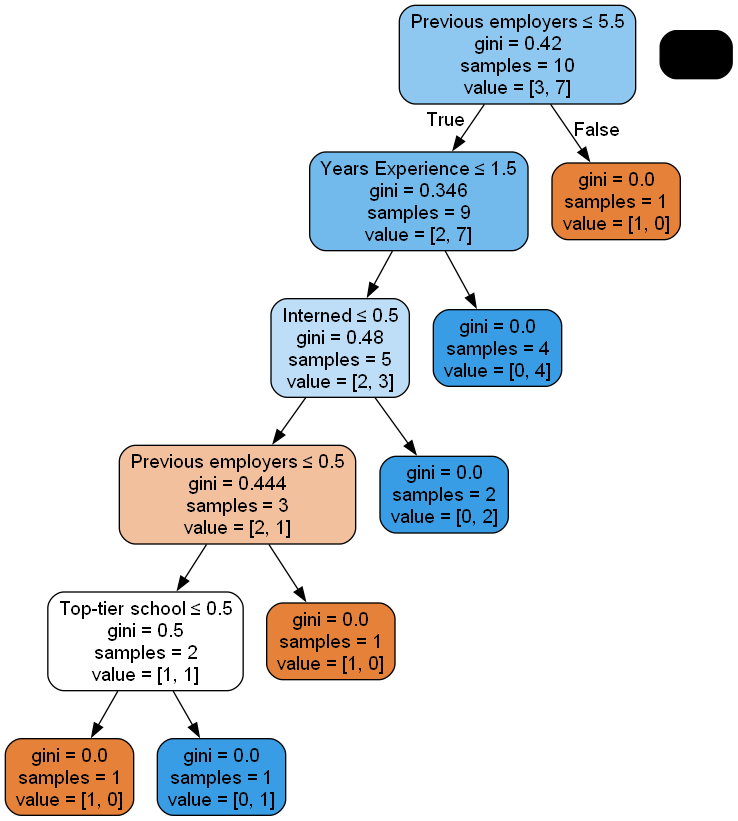

In [65]:
# import numpy as np
# import pandas as pd
# from sklearn import tree
# from IPython.display import Image  
# from six import StringIO  
# import pydotplus
# from sklearn.model_selection import train_test_split

# input_file = "PastHires.csv"
# df = pd.read_csv(input_file, header = 0)

# d = {'Y': 1, 'N': 0}
# df['Hired'] = df['Hired'].map(d)
# df['Employed?'] = df['Employed?'].map(d)
# df['Top-tier school'] = df['Top-tier school'].map(d)
# df['Interned'] = df['Interned'].map(d)
# d = {'BS': 0, 'MS': 1, 'PhD': 2}
# df['Level of Education'] = df['Level of Education'].map(d)
# df

features = list(df.columns[:6])
print(features)

X = df[features]
y = df["Hired"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf = tree.DecisionTreeClassifier()
# clf = clf.fit(X,y)
clf = clf.fit(X_train, y_train)

# tree.plot_tree(clf)

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features,
                         filled=True, rounded=True,
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

**How to construct a Decision Tree, step-by-step**

The first thing we do is decide whether <code>'Years Experience', 'Employed?', 'Previous employers', 'Level of Education', 'Top-tier school', 'Interned'</code> should be the question we ask at the very top of the tree.

1. To make that decision, we'll start by looking at how well <code>"Employed"</code> predicts whether or not someone is <code>"Hired"</code>


In [66]:
df

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0
5,0,0,0,2,1,1,1
6,5,1,2,1,0,1,1
7,3,0,1,0,0,1,1
8,15,1,5,0,0,0,1
9,0,0,0,0,0,0,0


To do this, we'll make a super simple tree that only asks if someone is <code>"Employed"</code>, and then we run the data down the tree.

For example, the first person in the dataset is "Employed", so they go to the <b>Leaf</b> on the <i>left</i>.

And because they do get "Hired", we'll keep track of that by putting a <b>1</b> under the word <b>Yes</code>.

In [67]:
df[["Employed?", "Hired"]]

,Employed?,Hired
0,1,1
1,0,1
2,0,0
3,1,1
4,0,0
5,0,1
6,1,1
7,0,1
8,1,1
9,0,0


Results:
* left [5, 0] 
* right [4, 4]

['Employed?']


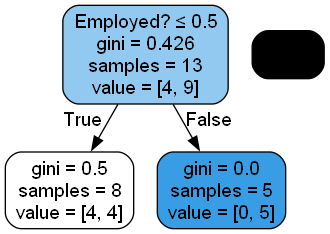

In [68]:
# construct the Decision Tree for "Employed?"
features = list(df.columns[1:2])
print(features)

X = df[features]
y = df["Hired"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)
# clf = clf.fit(X_train,y_train)

# tree.plot_tree(clf)

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features,
                         filled=True, rounded=True,
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

2. Now, let's do the exact same thing for <code>"Interned"</code>.

In [69]:
df[["Interned", "Hired"]]

,Interned,Hired
0,0,1
1,1,1
2,0,0
3,0,1
4,0,0
5,1,1
6,1,1
7,1,1
8,0,1
9,0,0


Results:
* left [5, 0] 
* right [4, 4]

['Interned']


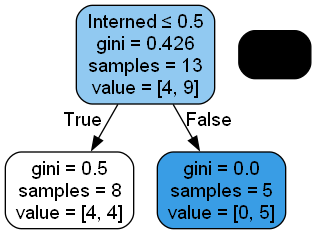

In [70]:
# construct the Decision Tree for "Interned"
features = list(df.columns[5:6])
print(features)

X = df[features]
y = df["Hired"]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

# tree.plot_tree(clf)

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features,
                         filled=True, rounded=True,
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

From our observation, we can see that there are 2 <b>Leaves</b> on the <i>right [4, 4]</i> that contains a mixture of people that <i>do</i> and <i>do not</i> get <b>Hired</b>.

These are called <b>Impure</b>.

We can also see that the 2 <b>Leaves</b> on the <i>left [5, 0]</i> only contains people who <i>do</i> get <b>Hired</b>.

In this case, it seems like both "Employed?" and "Interned" are the same at predicting who <i>will</i> and <i>will not</i> get <b>"Hired"</b>.

It would be nice if we could quantify "Employed?" and "Interned".

There are several ways to quantify the <b>Impurity</b> of the leaves.

One of the most popular methods is called <b>Gini Impurity</b>.

There are also others such as <b>Entropy</b> and <b>Information Gain</b>.

1. Let's start by calculating the <b>Gini Impurity</b> for "Employed?".

To calculate the Gini Impurity, we start by calculating the Gini Impurity for the individual Leaves.

The Gini Impurity for the Leaf on the left is: 

<code>Gini Impurity for a Leaf = 1 - (the probability of "Yes")² - (the probability of "No)²</code>

<code>Gini Impurity for a Leaf = 1 - (5/5)² - (0/5)²</code>

<code>Gini Impurity for a Leaf = 1 - 1</code>

<code>Gini Impurity for a Leaf = 0</code>


The Gini Impurity for the Leaf on the right is: 

<code>Gini Impurity for a Leaf = 1 - (4/(4+4))² - (4/(4+4))²</code>

<code>Gini Impurity for a Leaf = 1 - (4/8)² - (4/8)²</code>

<code>Gini Impurity for a Leaf = 1 - 0.5</code>

<code>Gini Impurity for a Leaf = 0.5</code>

Now, because the Leaf on the left has 5 people in it and the Leaf on the right has 8 people in it, the Leaves do not represent the same number of people.

Thus, the total Gini Impurity is the <b>Weighted Average</b> of the <b>Leaf Impurities</b>.

<code>Total <b>Gini Impurity</b> = weighted average of <b>Gini Impurities</b> for the <b>Leaves</b></code>

We start by calculating the weight for the leaf on the left.

The weight is the total number of people in the Leaf (5 + 0) divided by the total number of people in both Leaves (5 + 0 + 4 + 4 = 13).

Then we multiply that weight by its associated Gini Impurity (0).

<code>Total Gini Impurity = (5 / (5+8))*0</code>

Then we calculate and add the weight for the leaf on the right.

<code>Total Gini Impurity = (5 / (5+8))*0 + (8 / (5+8))*0.5</code>

<code>Total Gini Impurity = 0 + (8 / (5+8))*0.5</code>

<code>Total Gini Impurity = 0.307</code>

So, the <b>Gini Impurity</b> for both "Employed?" and "Interned" is 0.307

3. Now, we need to calculate the Gini Impurity for "Years Experience".

Notice that "Years Experience" contains numeric data, calculating the Gini Impurity is a little more involved.

The first thing we do is sort the rows by "Years Experience", from lowest to the highest value.

In [71]:
sorted_by_years_experience_df = df.sort_values("Years Experience", ascending=True)
sorted_by_years_experience_df[["Years Experience", "Hired"]]

,Years Experience,Hired
1,0,1
5,0,1
9,0,0
12,0,1
10,1,0
3,2,1
7,3,1
11,4,1
6,5,1
2,7,0


Then we calculate the average "Years Experience" for all adjacent people.

In [72]:
my_list = []
averages = []

for year in sorted_by_years_experience_df["Years Experience"]:
    my_list.append(year)

# Calculate the average for each adjacent pair
for i in range(len(my_list) - 1):
    average = (my_list[i] + my_list[i + 1]) / 2
    averages.append(average)

print(my_list)
print(averages)
sorted_by_years_experience_df[["Years Experience", "Hired"]]

[0, 0, 0, 0, 1, 2, 3, 4, 5, 7, 10, 15, 20]
[0.0, 0.0, 0.0, 0.5, 1.5, 2.5, 3.5, 4.5, 6.0, 8.5, 12.5, 17.5]


,Years Experience,Hired
1,0,1
5,0,1
9,0,0
12,0,1
10,1,0
3,2,1
7,3,1
11,4,1
6,5,1
2,7,0


From the above, we take each average "Years Experience" as the value in the <b>Root</b> and construct the Decision Tree.

Avg "Years Experience" < 0:
True: 
    Hired:
        Yes: 2
        No: 1
Gini Impurity: 0.445

False:
    Hired:
        Yes: 7
        No: 3
Gini Impurity: 0.42

Avg "Years Experience" < 0.5:
True:
    Hired:
        Yes: 3
        No: 1
Gini Impurity: 0.375

False:
    Hired:
        Yes: 6
        No: 3
Gini Impurity: 0.445

Avg "Years Experience" < 1.5:
True:
    Hired:
        Yes: 
        No: 
Gini Impurity:

False:
    Hired:
        Yes: 
        No: 
Gini Impurity:

Avg "Years Experience" < 2.5:
True:
    Hired:
        Yes: 
        No: 
Gini Impurity:

False:
    Hired:
        Yes: 
        No: 
Gini Impurity:

Avg "Years Experience" < 3.5:
True:
    Hired:
        Yes: 
        No: 
Gini Impurity:

False:
    Hired:
        Yes: 
        No: 
Gini Impurity:

Avg "Years Experience" < 4.5:
True:
    Hired:
        Yes: 
        No: 
Gini Impurity:

False:
    Hired:
        Yes: 
        No: 
Gini Impurity:

Avg "Years Experience" < 6.0:
True:
    Hired:
        Yes: 
        No: 
Gini Impurity:

False:
    Hired:
        Yes: 
        No: 
Gini Impurity:

Avg "Years Experience" < 8.5:
True:
    Hired:
        Yes: 
        No: 
Gini Impurity:

False:
    Hired:
        Yes: 
        No: 
Gini Impurity:

Avg "Years Experience" < 12.5:
True:
    Hired:
        Yes: 
        No: 
Gini Impurity:

False:
    Hired:
        Yes: 
        No: 
Gini Impurity:

Avg "Years Experience" < 17.5:
True:
    Hired:
        Yes: 
        No: 
Gini Impurity:

False:
    Hired:
        Yes: 
        No: 
Gini Impurity:

['Years Experience']


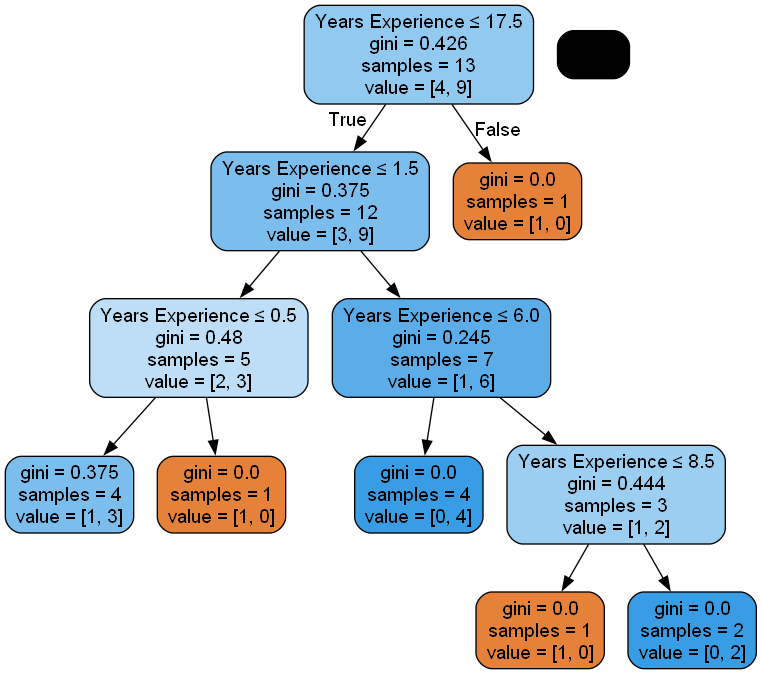

In [73]:
# construct the Decision Tree for each average "Years Experience"
features = list(df.columns[:1])
print(features)

X = df[features]
y = df["Hired"]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

# tree.plot_tree(clf)

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features,
                         filled=True, rounded=True,
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Lastly, we calculate the Total Gini Impurity values for each average "Years Experience".

1. Average "Years Experience" = 0,
Total Gini Impurity = 0.42576

2. Average "Years Experience" = 0.5,
Total Gini Impurity = 0.42345

3. Average "Years Experience" = 1.5,
Total Gini Impurity = 

4. Average "Years Experience" = 2.5,
Total Gini Impurity = 

5. Average "Years Experience" = 3.5,
Total Gini Impurity = 

6. Average "Years Experience" = 4.5,
Total Gini Impurity = 

7. Average "Years Experience" = 6.0,
Total Gini Impurity = 

8. Average "Years Experience" = 8.5,
Total Gini Impurity = 

9. Average "Years Experience" = 12.5,
Total Gini Impurity = 

10. Average "Years Experience" = 17.5,
Total Gini Impurity = 

['Previous employers']


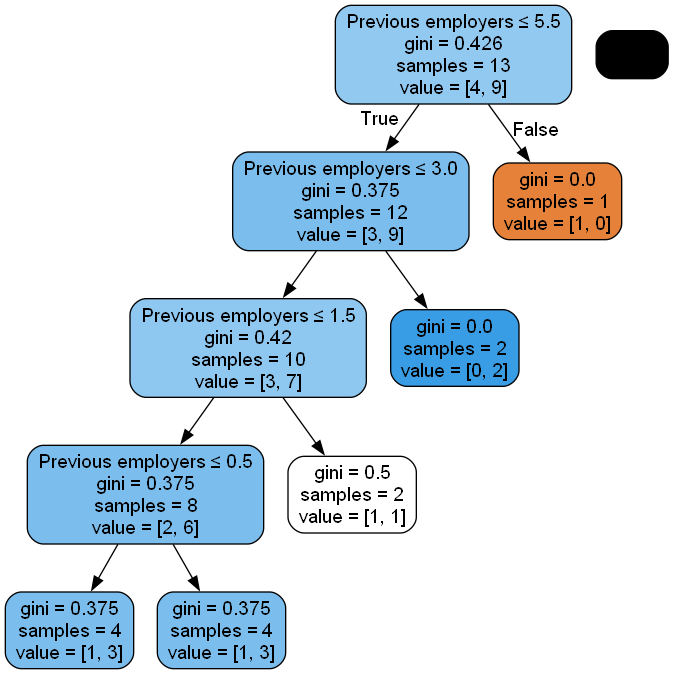

In [74]:
# construct the Decision Tree for "Previous employers"
features = list(df.columns[2:3])
print(features)

X = df[features]
y = df["Hired"]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

# tree.plot_tree(clf)

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features,
                         filled=True, rounded=True,
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

['Level of Education']


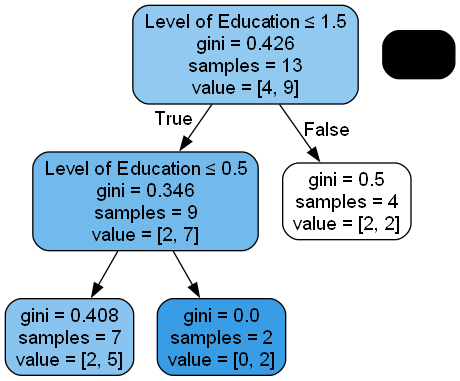

In [75]:
# construct the Decision Tree for "Level of Education"
features = list(df.columns[3:4])
print(features)

X = df[features]
y = df["Hired"]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

# tree.plot_tree(clf)

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features,
                         filled=True, rounded=True,
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

['Top-tier school']


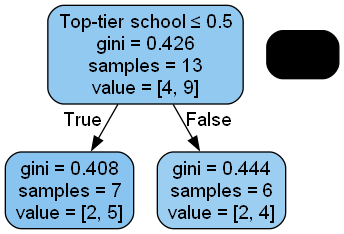

In [76]:
# construct the Decision Tree for "Top-tier school"
features = list(df.columns[4:5])
print(features)

X = df[features]
y = df["Hired"]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

# tree.plot_tree(clf)

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features,
                         filled=True, rounded=True,
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())